# Reading The Data
- Using pynwb

In [1]:
from pynwb import NWBHDF5IO, NWBFile, TimeSeries
from pynwb.behavior import Position, SpatialSeries
from pynwb.epoch import TimeIntervals
from pynwb.file import Subject
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from itertools import count

with NWBHDF5IO("sub-440957_ses-20190213T145027_behavior+ecephys+ogen.nwb", "r") as io:
    read_nwbfile = io.read()
    print(read_nwbfile.acquisition)

{'BehavioralEvents': BehavioralEvents pynwb.behavior.BehavioralEvents at 0x1647736945056
Fields:
  time_series: {
    delay_start_times <class 'pynwb.base.TimeSeries'>,
    delay_stop_times <class 'pynwb.base.TimeSeries'>,
    go_start_times <class 'pynwb.base.TimeSeries'>,
    go_stop_times <class 'pynwb.base.TimeSeries'>,
    left_lick_times <class 'pynwb.base.TimeSeries'>,
    photostim_start_times <class 'pynwb.base.TimeSeries'>,
    photostim_stop_times <class 'pynwb.base.TimeSeries'>,
    presample_start_times <class 'pynwb.base.TimeSeries'>,
    presample_stop_times <class 'pynwb.base.TimeSeries'>,
    right_lick_times <class 'pynwb.base.TimeSeries'>,
    sample_start_times <class 'pynwb.base.TimeSeries'>,
    sample_stop_times <class 'pynwb.base.TimeSeries'>,
    trialend_start_times <class 'pynwb.base.TimeSeries'>,
    trialend_stop_times <class 'pynwb.base.TimeSeries'>
  }
, 'BehavioralTimeSeries': BehavioralTimeSeries pynwb.behavior.BehavioralTimeSeries at 0x1647737307536
Fi

# Exploring functionalies of nwb module

In [2]:
#!pip install nwbwidgets
from nwbwidgets import nwb2widget

io = NWBHDF5IO("sub-440957_ses-20190213T145027_behavior+ecephys+ogen.nwb", mode="r")
nwbfile = io.read()

nwb2widget(nwbfile)

#Suppose to give overall structure of nwb file but encountering unexpected error.

In [3]:
nwbfile.subject

subject pynwb.file.Subject at 0x1647835917664
Fields:
  age__reference: birth
  date_of_birth: 2018-10-09 00:00:00-05:00
  description: SC016
  sex: M
  species: Mus musculus
  subject_id: 440957

In [4]:
trials_df = nwbfile.trials.to_dataframe()
trials_df

,start_time,stop_time,trial,photostim_onset,photostim_power,photostim_duration,trial_uid,task,task_protocol,trial_instruction,early_lick,outcome,auto_water,free_water
id,,,,,,,,,,,,,,
0,0.0000,5.2512,1,N/A,N/A,N/A,1,audio delay,1,right,early,hit,0,0
1,9.4959,14.3958,2,N/A,N/A,N/A,2,audio delay,1,right,no early,hit,0,0
2,16.1851,20.9083,3,N/A,N/A,N/A,3,audio delay,1,right,no early,hit,0,0
3,22.6976,27.5231,4,N/A,N/A,N/A,4,audio delay,1,right,no early,ignore,0,0
4,29.3136,34.2297,5,N/A,N/A,N/A,5,audio delay,1,right,no early,hit,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,3487.0914,3491.8707,497,N/A,N/A,N/A,497,audio delay,1,right,no early,hit,0,0
497,3494.1904,3499.0391,498,N/A,N/A,N/A,498,audio delay,1,right,no early,hit,0,0
498,3501.9728,3505.9265,499,N/A,N/A,N/A,499,audio delay,1,left,no early,miss,0,0


In [5]:
units_df = nwbfile.units.to_dataframe()
units_df

,unit,sampling_rate,unit_quality,unit_posx,unit_posy,unit_amp,unit_snr,isi_violation,avg_firing_rate,drift_metric,...,velocity_below,classification,anno_name,is_good_trials,spike_times,obs_intervals,electrodes,electrode_group,waveform_mean,waveform_sd
id,,,,,,,,,,,,,,,,,,,,,
0,0,30000,good,27.0,0.0,47.460320,3.216268,0.137601,0.806964,0.486110,...,NaN,unlabelled,,"[True, True, True, True, True, True, True, Tru...","[0.05187849792484123, 0.12474561697487196, 0.1...","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",l...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[0.6668203371970496, 0.44701659641728136, 0.91...",[nan]
1,1,30000,multi,59.0,0.0,88.335129,4.629063,0.000000,0.008220,0.041734,...,NaN,unlabelled,,"[True, True, True, True, True, True, True, Tru...","[350.9674507314316, 487.72716589600077, 1517.2...","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",l...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[2.990301724137931, 3.636853448275862, 4.60668...",[nan]
2,2,30000,multi,59.0,0.0,117.231140,5.440247,1.000000,2.846620,0.681476,...,NaN,unlabelled,,"[True, True, True, True, True, True, True, Tru...","[0.039711755722983355, 0.08944539781934502, 0....","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",l...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[0.5673261226725081, 0.45694140197152244, 0.37...",[nan]
3,3,30000,good,59.0,0.0,218.360166,10.420378,0.020564,3.917470,0.808959,...,NaN,unlabelled,,"[True, True, True, True, True, True, True, Tru...","[39.29803355766251, 80.28907420963154, 80.4640...","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",l...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[3.418364119433198, 2.9913651315789473, 2.7375...",[nan]
4,4,30000,good,59.0,0.0,406.947115,19.863375,0.000000,3.037950,0.503042,...,NaN,good,Dorsal peduncular area,"[True, True, True, True, True, True, True, Tru...","[0.2593131190814475, 0.5323148139669702, 0.702...","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",l...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[10.451923076923077, 9.947115384615385, 9.7596...",[nan]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,381,30000,good,59.0,1360.0,67.038066,3.002982,0.051910,1.772080,0.629746,...,2.060330,unlabelled,,"[True, True, True, True, True, True, True, Tru...","[0.8200646624999663, 1.5972081850397382, 2.576...","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[-3.602139261744967, -3.3819211409395975, -2.7...",[nan]
963,383,30000,multi,27.0,1760.0,98.380335,4.532427,0.000000,0.011621,0.062731,...,0.000000,unlabelled,,"[True, True, True, True, True, True, True, Tru...","[238.4006415427377, 829.5028515161549, 2033.18...","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[-6.059451219512195, -5.201981707317073, -4.28...",[nan]
964,384,30000,multi,27.0,1760.0,109.878701,4.584050,0.000000,0.021542,0.065425,...,1.373550,unlabelled,,"[True, True, True, True, True, True, True, Tru...","[883.375443383233, 1081.8716938753976, 1082.14...","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[-1.1101973684210527, -4.625822368421052, -6.3...",[nan]


In [6]:
import ast

In [7]:
units_df.electrodes.apply(lambda x: len(x)).value_counts()
units_df.electrodes.apply(lambda x: type(x)).value_counts()

<class 'pandas.core.frame.DataFrame'>    967
Name: electrodes, dtype: int64

In [8]:
units_df.electrodes.apply(lambda x: ast.literal_eval(x.location.values[0])['brain_regions']).value_counts()

right Striatum    359
left Striatum     315
right ALM         293
Name: electrodes, dtype: int64

In [9]:
ast.literal_eval(units_df.electrodes.values[800]["location"].values[0])
#units_df.electrodes[150].reset_index().x.values

#Accessing part-of-the-brain(Need to know unique part of brains) & Co-ordination (yet to done)

{'brain_regions': 'right Striatum',
 'skull_reference': 'Bregma',
 'ap_location': '0.00',
 'ml_location': '2500.00',
 'depth': '-4400.00',
 'theta': '10.00',
 'phi': '0.00',
 'beta': '60.00'}

In [10]:
#Querying the data as per the need (Only Successful attempts are being considered here)
trials = trials_df.query("photostim_onset != 'N/A' and (outcome == 'hit' or outcome == 'miss')")
units = units_df.query("classification == 'good'").reset_index()
units

,id,unit,sampling_rate,unit_quality,unit_posx,unit_posy,unit_amp,unit_snr,isi_violation,avg_firing_rate,...,velocity_below,classification,anno_name,is_good_trials,spike_times,obs_intervals,electrodes,electrode_group,waveform_mean,waveform_sd
0,4,4,30000,good,59.0,0.0,406.947115,19.863375,0.000000,3.037950,...,NaN,good,Dorsal peduncular area,"[True, True, True, True, True, True, True, Tru...","[0.2593131190814475, 0.5323148139669702, 0.702...","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",l...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[10.451923076923077, 9.947115384615385, 9.7596...",[nan]
1,14,15,30000,good,11.0,180.0,109.976708,5.275242,0.073159,4.653290,...,0.000000,good,Olfactory areas,"[True, True, True, True, True, True, True, Tru...","[0.25401308617707663, 0.35208036167807855, 0.4...","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",l...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[-0.016983695652173912, -0.19652562111801242, ...",[nan]
2,91,98,30000,good,43.0,1060.0,61.662834,2.976889,0.006073,10.119800,...,-2.964560,good,"Prelimbic area, layer 6b","[True, True, True, True, True, True, True, Tru...","[0.0529451712137714, 0.07537864382158022, 0.10...","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[1.0679183467741935, 1.3112714213709677, 1.240...",[nan]
3,95,102,30000,good,43.0,1100.0,104.672281,5.831190,0.014125,2.355700,...,-2.174780,good,"Prelimbic area, layer 6b","[True, True, True, True, True, True, True, Tru...","[0.08804538912762405, 3.566700319110314, 10.15...","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[1.3367491883116882, 1.1515827922077921, 0.895...",[nan]
4,102,109,30000,good,11.0,1140.0,248.184540,12.069299,0.000000,2.058930,...,0.343386,good,"Prelimbic area, layer 6a","[True, True, True, True, True, True, True, Tru...","[0.1536791299370983, 0.3191468238823649, 1.450...","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[2.0469094162995596, 1.9797976321585904, 1.778...",[nan]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,927,346,30000,good,43.0,660.0,125.645380,2.642676,0.035332,4.761540,...,NaN,good,Caudoputamen,"[True, True, True, True, True, True, True, Tru...","[0.052021259272768905, 0.40975928294510444, 0....","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[2.519116531850354, 2.3508594539939334, 1.9408...",[nan]
166,941,360,30000,good,27.0,1160.0,98.288499,2.642417,0.000000,0.329643,...,0.000000,good,Caudoputamen,"[True, True, True, True, True, True, True, Tru...","[1.8037108925173861, 18.189753021328954, 26.13...","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[1.6349871134020617, 1.5101481958762886, 1.872...",[nan]
167,942,361,30000,good,43.0,1300.0,145.210701,5.814128,0.026635,8.970930,...,NaN,good,Caudoputamen,"[True, True, True, True, True, True, True, Tru...","[0.050587907146612654, 0.21105667773537728, 1....","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[0.31960227272727276, 0.6297348484848485, 0.63...",[nan]
168,951,370,30000,good,59.0,1760.0,138.066665,6.520817,0.028408,4.732630,...,-0.686776,good,Caudoputamen,"[True, True, True, True, True, True, True, Tru...","[1.7526102225313918, 2.269717002370093, 2.2909...","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",...,18005107871 1-384 pynwb.ecephys.ElectrodeGroup...,"[1.492561037639878, 2.2030773143438456, 2.4987...",[nan]


In [11]:
trials

,start_time,stop_time,trial,photostim_onset,photostim_power,photostim_duration,trial_uid,task,task_protocol,trial_instruction,early_lick,outcome,auto_water,free_water
id,,,,,,,,,,,,,,
31,202.9057,206.7780,32,2.046,5.500,0.5000,32,audio delay,1,left,no early,miss,0,0
37,241.5566,246.3362,38,1.816,5.500,0.5000,38,audio delay,1,left,no early,hit,0,0
39,253.9740,258.9920,40,2.058,5.500,0.5000,40,audio delay,1,left,no early,hit,0,0
41,266.5867,270.3717,42,1.830,5.500,0.5000,42,audio delay,1,right,no early,miss,0,0
42,272.2012,276.1265,43,1.935,5.500,0.5000,43,audio delay,1,right,no early,miss,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,3162.8479,3167.6416,454,1.880,5.500,0.5000,454,audio delay,1,left,no early,hit,0,0
456,3184.1009,3189.0616,457,1.977,5.500,0.5000,457,audio delay,1,left,no early,hit,0,0
470,3289.8850,3293.8086,471,1.958,5.500,0.5000,471,audio delay,1,right,no early,miss,0,0


## Making Data Useable

In [12]:
with NWBHDF5IO("sub-440957_ses-20190213T145027_behavior+ecephys+ogen.nwb", "r") as io:
    read_nwbfile = io.read()
    #for i in 
    #print(read_nwbfile.acquisition["BehavioralEvents"]["trialend_start_times"].timestamps[:4])
    #print(read_nwbfile.acquisition["BehavioralEvents"]["trialend_stop_times"].timestamps[:4])
    pre_start = read_nwbfile.acquisition["BehavioralEvents"]["presample_start_times"].timestamps[:]
    pre_stop = read_nwbfile.acquisition["BehavioralEvents"]["presample_stop_times"].timestamps[:]
    sample_start = read_nwbfile.acquisition["BehavioralEvents"]["sample_start_times"].timestamps[:]
    sample_stop = read_nwbfile.acquisition["BehavioralEvents"]["sample_stop_times"].timestamps[:]
    delay_start = read_nwbfile.acquisition["BehavioralEvents"]["delay_start_times"].timestamps[:]
    delay_stop = read_nwbfile.acquisition["BehavioralEvents"]["delay_stop_times"].timestamps[:]
    go_start = read_nwbfile.acquisition["BehavioralEvents"]["go_start_times"].timestamps[:]
    go_stop = read_nwbfile.acquisition["BehavioralEvents"]["go_stop_times"].timestamps[:]
    
def Clean_data(pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop):
    sample_start = np.intersect1d(pre_stop, sample_start)
    sample_stop = np.intersect1d(sample_stop, delay_start)
    delay_start = np.intersect1d(delay_start, sample_stop)
    delay_stop = np.intersect1d(delay_stop, go_start)
    return pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop

pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop = Clean_data(pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop)

In [13]:
len(delay_start)

501

In [14]:
trials_df = trials_df.assign(pre_start = pre_start,
                             pre_stop = pre_stop,
                             sample_start = sample_start,
                             sample_stop = sample_stop,
                             delay_start = delay_start,
                             delay_stop = delay_stop,
                             go_start = go_start,
                             go_stop = go_stop)
trials_df

,start_time,stop_time,trial,photostim_onset,photostim_power,photostim_duration,trial_uid,task,task_protocol,trial_instruction,...,auto_water,free_water,pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop
id,,,,,,,,,,,,,,,,,,,,,
0,0.0000,5.2512,1,N/A,N/A,N/A,1,audio delay,1,right,...,0,0,0.5000,1.2315,1.2315,2.3153,2.3153,3.5153,3.5153,5.0153
1,9.4959,14.3958,2,N/A,N/A,N/A,2,audio delay,1,right,...,0,0,9.9959,10.8277,10.8277,11.4777,11.4777,12.6777,12.6777,14.1777
2,16.1851,20.9083,3,N/A,N/A,N/A,3,audio delay,1,right,...,0,0,16.6851,17.3805,17.3805,18.0305,18.0305,19.2305,19.2305,20.7305
3,22.6976,27.5231,4,N/A,N/A,N/A,4,audio delay,1,right,...,0,0,23.1976,23.8731,23.8731,24.5231,24.5231,25.7231,25.7231,27.2231
4,29.3136,34.2297,5,N/A,N/A,N/A,5,audio delay,1,right,...,0,0,29.8136,30.6670,30.6670,31.3170,31.3170,32.5170,32.5170,34.0170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,3487.0914,3491.8707,497,N/A,N/A,N/A,497,audio delay,1,right,...,0,0,3487.5914,3488.3438,3488.3438,3488.9938,3488.9938,3490.1938,3490.1938,3491.6938
497,3494.1904,3499.0391,498,N/A,N/A,N/A,498,audio delay,1,right,...,0,0,3494.6904,3495.5032,3495.5032,3496.1532,3496.1532,3497.3532,3497.3532,3498.8532
498,3501.9728,3505.9265,499,N/A,N/A,N/A,499,audio delay,1,left,...,0,0,3502.4728,3503.3551,3503.3551,3504.0051,3504.0051,3505.2051,3505.2051,3506.7051


## Spike Rate Plotting

In [15]:
import ast
units_df['Region'] = units_df.electrodes.apply(lambda x: ast.literal_eval(x.location.values[0])['brain_regions'])
#print(units_df.Region.unique())

trials_Data = trials_df.query("photostim_onset == 'N/A' and outcome == 'hit' ")
units_Data = units_df.query(" Region == 'right ALM' and classification == 'good'")

In [16]:
units_Data

,unit,sampling_rate,unit_quality,unit_posx,unit_posy,unit_amp,unit_snr,isi_violation,avg_firing_rate,drift_metric,...,classification,anno_name,is_good_trials,spike_times,obs_intervals,electrodes,electrode_group,waveform_mean,waveform_sd,Region
id,,,,,,,,,,,,,,,,,,,,,
4,4,30000,good,59.0,0.0,406.947115,19.863375,0.000000,3.037950,0.503042,...,good,Dorsal peduncular area,"[True, True, True, True, True, True, True, Tru...","[0.2593131190814475, 0.5323148139669702, 0.702...","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",l...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[10.451923076923077, 9.947115384615385, 9.7596...",[nan],right ALM
14,15,30000,good,11.0,180.0,109.976708,5.275242,0.073159,4.653290,0.112311,...,good,Olfactory areas,"[True, True, True, True, True, True, True, Tru...","[0.25401308617707663, 0.35208036167807855, 0.4...","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",l...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[-0.016983695652173912, -0.19652562111801242, ...",[nan],right ALM
91,98,30000,good,43.0,1060.0,61.662834,2.976889,0.006073,10.119800,0.168698,...,good,"Prelimbic area, layer 6b","[True, True, True, True, True, True, True, Tru...","[0.0529451712137714, 0.07537864382158022, 0.10...","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[1.0679183467741935, 1.3112714213709677, 1.240...",[nan],right ALM
95,102,30000,good,43.0,1100.0,104.672281,5.831190,0.014125,2.355700,0.247923,...,good,"Prelimbic area, layer 6b","[True, True, True, True, True, True, True, Tru...","[0.08804538912762405, 3.566700319110314, 10.15...","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[1.3367491883116882, 1.1515827922077921, 0.895...",[nan],right ALM
102,109,30000,good,11.0,1140.0,248.184540,12.069299,0.000000,2.058930,0.167432,...,good,"Prelimbic area, layer 6a","[True, True, True, True, True, True, True, Tru...","[0.1536791299370983, 0.3191468238823649, 1.450...","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[2.0469094162995596, 1.9797976321585904, 1.778...",[nan],right ALM
103,110,30000,good,43.0,1140.0,105.489345,5.075341,0.000000,0.322559,0.074252,...,good,"Prelimbic area, layer 6a","[True, True, True, True, True, True, True, Tru...","[4.15213728703149, 4.727274191006436, 4.965342...","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[1.0833150263620386, 1.0668387521968365, 0.416...",[nan],right ALM
107,114,30000,good,27.0,1200.0,136.888690,6.707563,0.040672,1.407300,0.138874,...,good,"Prelimbic area, layer 6a","[True, True, True, True, True, True, True, Tru...","[0.11057886235627068, 0.19291270684555517, 0.2...","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[0.41540785498489424, 0.28087235649546827, -0....",[nan],right ALM
109,116,30000,good,11.0,1220.0,64.859592,3.812592,0.035535,2.123560,0.204996,...,good,"Prelimbic area, layer 6a","[True, True, True, True, True, True, True, Tru...","[0.5356815015351555, 0.7694496195122209, 1.142...","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[1.9510405549626466, 1.8259738527214513, 1.833...",[nan],right ALM
110,117,30000,good,11.0,1220.0,84.273649,4.517818,0.011373,2.621570,0.211341,...,good,"Prelimbic area, layer 6a","[True, True, True, True, True, True, True, Tru...","[0.17591260130323327, 0.31541346737110976, 0.5...","[[0.0, 5.2512], [9.4959, 14.3958], [16.1851, 2...",...,17131309211 1-301 pynwb.ecephys.ElectrodeGroup...,"[1.7077702702702704, 1.7508445945945947, 1.697...",[nan],right ALM


# New data based on Delay range [1.0,1.2]




In [18]:
trials_Data = trials_Data.query(" (delay_stop - delay_start) > 1 and (delay_stop - delay_start) < 1.3")
trials_Data = trials_Data.query(" (stop_time - start_time) < 5.3")
trials_Data

,start_time,stop_time,trial,photostim_onset,photostim_power,photostim_duration,trial_uid,task,task_protocol,trial_instruction,...,auto_water,free_water,pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop
id,,,,,,,,,,,,,,,,,,,,,
0,0.0000,5.2512,1,N/A,N/A,N/A,1,audio delay,1,right,...,0,0,0.5000,1.2315,1.2315,2.3153,2.3153,3.5153,3.5153,5.0153
1,9.4959,14.3958,2,N/A,N/A,N/A,2,audio delay,1,right,...,0,0,9.9959,10.8277,10.8277,11.4777,11.4777,12.6777,12.6777,14.1777
2,16.1851,20.9083,3,N/A,N/A,N/A,3,audio delay,1,right,...,0,0,16.6851,17.3805,17.3805,18.0305,18.0305,19.2305,19.2305,20.7305
4,29.3136,34.2297,5,N/A,N/A,N/A,5,audio delay,1,right,...,0,0,29.8136,30.6670,30.6670,31.3170,31.3170,32.5170,32.5170,34.0170
12,76.0135,81.0562,13,N/A,N/A,N/A,13,audio delay,1,left,...,0,0,76.5135,77.2241,77.2241,77.8741,77.8741,79.0741,79.0741,80.5741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,3472.0742,3476.9888,495,N/A,N/A,N/A,495,audio delay,1,right,...,0,0,3472.5742,3473.3628,3473.3628,3474.0128,3474.0128,3475.2128,3475.2128,3476.7128
496,3487.0914,3491.8707,497,N/A,N/A,N/A,497,audio delay,1,right,...,0,0,3487.5914,3488.3438,3488.3438,3488.9938,3488.9938,3490.1938,3490.1938,3491.6938
497,3494.1904,3499.0391,498,N/A,N/A,N/A,498,audio delay,1,right,...,0,0,3494.6904,3495.5032,3495.5032,3496.1532,3496.1532,3497.3532,3497.3532,3498.8532


# Plotting with phases

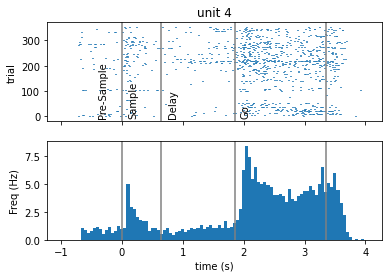

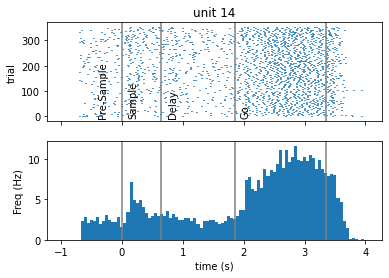

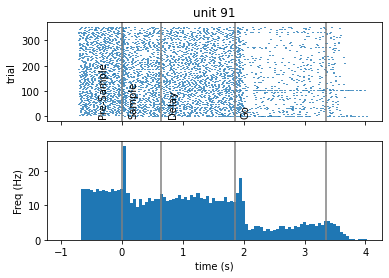

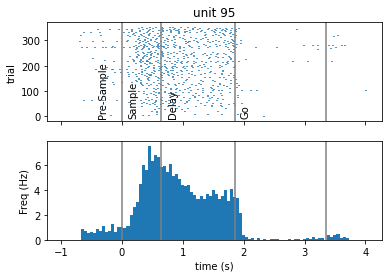

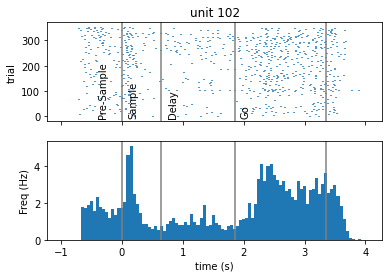

In [19]:
import seaborn as sns
ids = trials_Data.reset_index().id
unit_id = units_Data.reset_index().id
on_times = trials_Data["start_time"]
off_times = trials_Data["stop_time"]
after = 4.3
before = -0.7
spike_data = []
for unit in unit_id[:5]:
    unit_spike_times = units_Data["spike_times"][unit]
    trial_spikes = []
    i = 0
    for time in trials_Data['sample_start']:
        # Compute spike times relative to stimulus onset
        aligned_spikes = unit_spike_times - time
        # Keep only spike times in a given time window around the stimulus onset
        aligned_spikes = aligned_spikes[aligned_spikes < after ]
        i = i+1
        aligned_spikes = aligned_spikes[before < aligned_spikes]
        trial_spikes.append(aligned_spikes)
    fig, axs = plt.subplots(2, 1, sharex="all")
    plt.xlabel("time (s)")
    spike_data.append(trial_spikes)
    
    axs[0].eventplot(trial_spikes)
    axs[0].set_ylabel("trial")
    axs[0].set_title("unit {}".format(unit))
    axs[0].axvline(0, color=[0.5, 0.5, 0.5])
    axs[0].text(0.1,0,'Sample',rotation=90)
    axs[0].axvline(0.65, color=[0.5, 0.5, 0.5])
    axs[0].text(0.75,0,'Delay',rotation=90)
    axs[0].text(1.95,0,'Go',rotation=90)
    axs[0].text(-0.4,0,'Pre-Sample',rotation=90)
    axs[0].axvline(1.85, color=[0.5, 0.5, 0.5])
    axs[0].axvline(3.35, color=[0.5, 0.5, 0.5])
    
    hist, edges = np.histogram(np.hstack(trial_spikes), bins=(np.arange(101)/20) - 1)
    freq = hist/len(trials_Data)*20
    width = np.diff(edges)
    axs[1].bar(edges[1:], freq,width=width)
    
    
#     axs[1].hist(np.hstack(trial_spikes), 30)
    axs[1].set_ylabel("Freq (Hz)")
    axs[1].axvline(0, color=[0.5, 0.5, 0.5])
    axs[1].axvline(0.65, color=[0.5, 0.5, 0.5])
    axs[1].axvline(1.85, color=[0.5, 0.5, 0.5])
    axs[1].axvline(3.35, color=[0.5, 0.5, 0.5])
    #sns.kdeplot(ax=axs[1], data=np.hstack(trial_spikes))

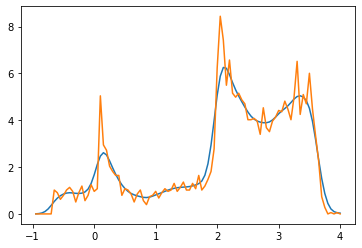

In [20]:
hist, edges = np.histogram(np.hstack(spike_data[0]), bins=(np.arange(101)/20) - 1)
freq = (hist/len(trials_Data))*20
width = np.diff(edges)
smooth_gauss = []

#plt.plot(edges[1:], freq)
for i in edges[1:]:
    gauss = np.exp((- ( edges[1:] - i) ** 2) / ( 2 * (0.1**2) ) )
    gauss /=  sum(gauss)
    smooth_gauss.append(sum(gauss*freq))
plt.plot(edges[1:],smooth_gauss)
plt.plot(edges[1:],freq)

In [21]:
def get_smooth_gauss(spike_data,sigma,color,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(101)/20) - 1)
    freq = (hist/len(dataset))*20
    width = np.diff(edges)
    smooth_gauss = []

    for i in edges[1:]:
        gauss = np.exp((- ( edges[1:] - i) ** 2) / ( 2 * (sigma**2) ) )
        gauss /=  sum(gauss)
        smooth_gauss.append(sum(gauss*freq))
    plt.plot(edges[1:],smooth_gauss,color=color)
    #plt.plot(edges[1:],freq)
    
    #return freq,edges[1:],smooth_gauss
    
def return_smooth_gauss(spike_data,sigma,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(101)/20) - 1)
    freq = (hist/len(dataset))*20
    width = np.diff(edges)
    smooth_gauss = []

    for i in edges[1:]:
        gauss = np.exp((- ( edges[1:] - i) ** 2) / ( 2 * (sigma**2) ) )
        gauss /=  sum(gauss)
        smooth_gauss.append(sum(gauss*freq))
    
    return freq,edges[1:],smooth_gauss

In [22]:
# for i in spike_data:
#     fig, axs = plt.subplots(1, 1, sharex="all")
#     freq,edges,smooth_gauss = get_smooth_gauss(i,0.1,'r')

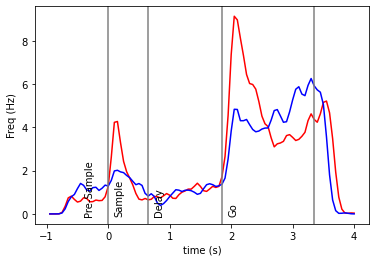

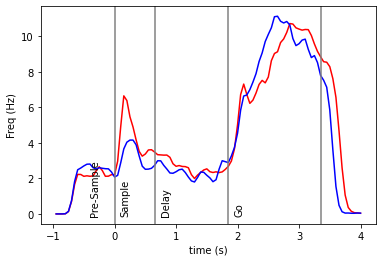

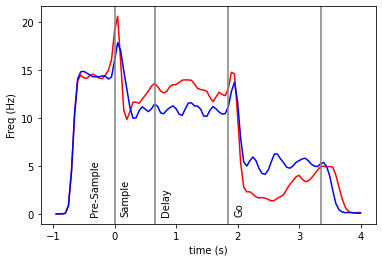

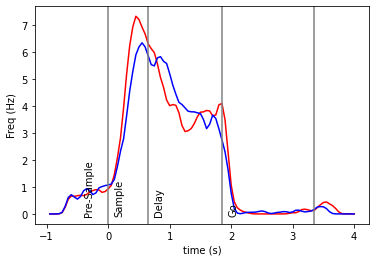

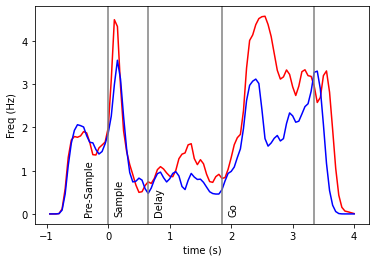

In [24]:
trials_Data_L = trials_Data[ trials_Data['trial_instruction'] == 'left']
trials_Data_R = trials_Data[ trials_Data['trial_instruction'] == 'right']

def get_firing_rate_graph(Trial_Data1,Trial_Data2,sigma):
    after = 4.35
    before = -0.7
    spike_data = []
    
    for unit in units_Data.reset_index().id[:5]:
        unit_spike_times = units_Data["spike_times"][unit]
        trial_spikes_l = []
        trial_spikes_r = []
        i = 0
        for time in Trial_Data1['sample_start']:
            # Compute spike times relative to stimulus onset
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_spikes_l.append(aligned_spikes1)
            
        for time in Trial_Data2['sample_start']:
            # Compute spike times relative to stimulus onset
            aligned_spikes = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes = aligned_spikes[aligned_spikes < after ]
            aligned_spikes = aligned_spikes[before < aligned_spikes]
            trial_spikes_r.append(aligned_spikes)            
            
        fig, axs = plt.subplots(1, 1, sharex="all")
        
        
        plt.xlabel("time (s)")
        
        get_smooth_gauss(trial_spikes_l,sigma,'r',trials_Data_L)
        get_smooth_gauss(trial_spikes_r,sigma,'b',trials_Data_R)
        axs.set_ylabel("Freq (Hz)")
        axs.axvline(0, color=[0.5, 0.5, 0.5])
        axs.axvline(0.65, color=[0.5, 0.5, 0.5])
        axs.axvline(1.85, color=[0.5, 0.5, 0.5])
        axs.axvline(3.35, color=[0.5, 0.5, 0.5])
        
        axs.text(0.1,0,'Sample',rotation=90)
        axs.text(0.75,0,'Delay',rotation=90)
        axs.text(1.95,0,'Go',rotation=90)
        axs.text(-0.4,0,'Pre-Sample',rotation=90)
get_firing_rate_graph(trials_Data_L,trials_Data_R,0.05)

In [25]:
len(trials_Data_L),len(trials_Data_R)

(191, 162)

In [33]:
def get_firing_rate_over_neurons(Trial_Data1,Trial_Data2,sigma):
    after = 4.3
    before = -0.7
    spike_data_l = []
    spike_data_r = []
    
    for unit in units_Data.reset_index()['id']:
        unit_spike_times = units_Data["spike_times"][unit]
        trial_spikes_l = []
        trial_spikes_r = []
        i = 0
        for time in Trial_Data1['sample_start']:
            # Compute spike times relative to stimulus onset
            aligned_spikes = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes = aligned_spikes[aligned_spikes < after ]
            aligned_spikes = aligned_spikes[before < aligned_spikes]
            trial_spikes_l.append(aligned_spikes)
            
        frq_l,edge,smooth_l = return_smooth_gauss(trial_spikes_l,sigma,trials_Data_L)    
        spike_data_l.append(smooth_l)
            
        for time in Trial_Data2['sample_start']:
            # Compute spike times relative to stimulus onset
            aligned_spikes = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes = aligned_spikes[aligned_spikes < after ]
            aligned_spikes = aligned_spikes[before < aligned_spikes]
            trial_spikes_r.append(aligned_spikes)
            
        frq_r,edge,smooth_r = return_smooth_gauss(trial_spikes_r,sigma,trials_Data_R)    
        spike_data_r.append(smooth_r)    
        
    return spike_data_l,spike_data_r,edge

l,r,edges = get_firing_rate_over_neurons(trials_Data_L,trials_Data_R,0.1)

In [27]:
# avg_left_rate = np.array(l).mean(axis=0)
# avg_right_rate = np.array(r).mean(axis=0)


# fig, axs = plt.subplots(1, 1, sharex="all")
# axs.plot(edges,avg_left_rate,c='r')
# axs.plot(edges,avg_right_rate,c='b')
# axs.axvline(0, color=[0.5, 0.5, 0.5])
# axs.axvline(0.65, color=[0.5, 0.5, 0.5])
# axs.axvline(1.85, color=[0.5, 0.5, 0.5])
# axs.axvline(3.35, color=[0.5, 0.5, 0.5])

# axs.text(0.1,0,'Sample',rotation=90)
# axs.text(0.75,0,'Delay',rotation=90)
# axs.text(1.95,0,'Go',rotation=90)
# axs.text(-0.4,0,'Pre-Sample',rotation=90)
# axs.set_ylabel("Freq (Hz)")
# axs.legend(['Left','Right'])
# plt.show()

In [34]:
diff_cd = (np.array(r)-np.array(l))
delay_avg_diff = diff_cd[:,32:57].mean(axis=1)
newly_l = np.array(l).T.dot(delay_avg_diff)
newly_r = np.array(r).T.dot(delay_avg_diff)

In [35]:
#Delay period CD Apply (Yet to finish)    (**FINISHED**)
# diff_cd = (np.array(l)-np.array(r)).mean(axis=1)
# newly_l = np.array(l).T.dot(diff_cd)
# newly_r = np.array(r).T.dot(diff_cd)

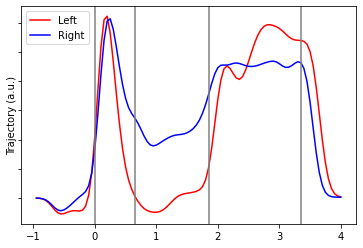

In [36]:
fig, axs = plt.subplots(1, 1, sharex="all")
axs.plot(edges,newly_l,c='r')
axs.plot(edges,newly_r,c='b')
axs.axvline(0, color=[0.5, 0.5, 0.5])
axs.axvline(0.65, color=[0.5, 0.5, 0.5])
axs.axvline(1.85, color=[0.5, 0.5, 0.5])
axs.axvline(3.35, color=[0.5, 0.5, 0.5])

# axs.text(0.1,-3000,'Sample',rotation=90)
# axs.text(0.75,-3000,'Delay',rotation=90)
# axs.text(1.95,-3000,'Go',rotation=90)
# axs.text(-0.4,-3000,'Pre-Sample',rotation=90)
axs.set_ylabel("Trajectory (a.u.)")
axs.tick_params(labelleft = False)
axs.legend(['Left','Right'])
plt.show()

# Distribution during delay and go phase

In [31]:
def get_phases_rate_graph(Trial_Data1,Trial_Data2,sigma):

    spike_data = []
    
    for unit in units_Data.reset_index().id:
        unit_spike_times = units_Data["spike_times"][unit]
        trial_spikes_go_l = []
        trial_spikes_go_r = []
        trial_spikes_delay_l = []
        trial_spikes_delay_r = []
        trial_sample_l = []
        trial_sample_r = []
        
    
        for time in Trial_Data1['sample_start']:
            # Compute spike times relative to stimulus onset
            
            after = 3.35
            before = 1.85
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_spikes_go_l.append(aligned_spikes1)
            
            after = 1.85
            before = 0.65
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_spikes_delay_l.append(aligned_spikes1)
            
            after = 0.65
            before = 0
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_sample_l.append(aligned_spikes1)
            
        for time in Trial_Data2['sample_start']:
            # Compute spike times relative to stimulus onset
            
            after = 3.35
            before = 1.85
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_spikes_go_r.append(aligned_spikes1)
            
            after = 1.85
            before = 0.65
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_spikes_delay_r.append(aligned_spikes1)        
            
            after = 0.65
            before = 0
            aligned_spikes1 = unit_spike_times - time
            # Keep only spike times in a given time window around the stimulus onset
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_sample_r.append(aligned_spikes1)   
              
    return trial_sample_l, trial_sample_r, trial_spikes_go_l,trial_spikes_go_r,trial_spikes_delay_l,trial_spikes_delay_r     

def get_freq_edge(spike_data,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(31)/20) + 1.80)
    freq = (hist/len(dataset))*20
    return freq,edges[1:]

def get_freq_edge_1(spike_data,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(25)/20) + 0.60)
    freq = (hist/len(dataset))*20
    return freq,edges[1:]

def get_freq_edge_2(spike_data,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(14)/20) + 0)
    freq = (hist/len(dataset))*20
    return freq,edges[1:]


sample_l, sample_r, go_l,go_r,delay_l,delay_r = get_phases_rate_graph(trials_Data_L,trials_Data_R,0.1)
freq_sample_l,edges2 = get_freq_edge_2(sample_l,trials_Data_L)
freq_sample_r,edges2 = get_freq_edge_2(sample_r,trials_Data_R)
freq_go_l,edges = get_freq_edge(go_l,trials_Data_L)
freq_go_r,edges = get_freq_edge(go_r,trials_Data_R)
freq_delay_l,edges1 = get_freq_edge_1(delay_l,trials_Data_L)
freq_delay_r,edges1 = get_freq_edge_1(delay_r,trials_Data_R)

<AxesSubplot:ylabel='Density'>

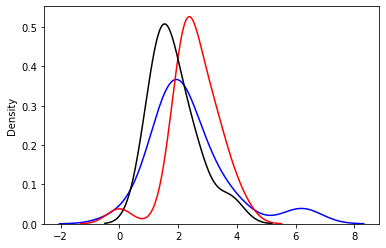

In [32]:
#Delay vs Go(Phases vs Phases)(Yet to finish)
sns.kdeplot(freq_go_l + freq_go_r, c='b')
sns.kdeplot(freq_delay_l + freq_delay_r, c='r')
sns.kdeplot(freq_sample_l + freq_sample_r, c='black')